# <font color="bordo">Regularization</font>
<!-- A Complete Tutorial on Ridge and Lasso Regression in Python
https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/ -->

## Result of regularization

Reducing the magnitude of the parameters $θ$ (by penalizing large values) 
gives us simpler hypothesis (smoother curve)
  - Effectively get rid of some of the terms
  - Reduce model complexity - a simpler hypothesis is less prone to overfitting

## Cost function optimization with regularization

### Penalize and make some of the $θ$ parameters really small
e.g. modify our cost function to penalize large $θ_3$ and $θ_4$
<img src="images/regularization - 1.png">

### Here we end up with $θ_3$ and $θ_4$ being close to zero
so we're basically left with a quadratic function: <font size="3em">$θ_0 + θ_1x + θ_2x^2$</font>
<img src="images/regularization - 2.png">

### In general we penalized ALL our parameters
<img src="images/regularization - 3.png">
  - By convention you don't penalize $θ_0$ - minimization is from $θ_1$ onwards
  - *<font color="blue" size="3em">$λ$</font>* is the *<font color="blue">regularization parameter</font>*
    - Controls a trade off between our two goals:
      - Fit the training set well
      - Keep parameters small

### How to choose λ
- <font color="red">If λ is very large</font> we end up penalizing ALL the parameters (θ1, θ2 etc.) 
  <br>so all the parameters end up being close to zero
  <br>If this happens, it's like we got rid of all the terms in the hypothesis
  <br>This results here is then <font color="red">underfitting</font>
  <br>So this hypothesis is too <font color="red">biased</font> because of the absence of any parameters (effectively)
<p>
- So, λ should be chosen carefully - not too big
  <br>We look at some automatic ways to select λ later...

### <font color="bordo">Cost Function with Regularization for Linear Regression</font>
<img src="images/regularization - LR - 1.png">print(__doc__)


<p>
- Previously, Gradient Descent would repeatedly update the parameters $θ_j$, where j = 0,1,2...n simultaneously
<img src="images/regularization - LR - 2.png" />
<p>
- Lets write the case for $θ_0$ separately
<img src="images/regularization - LR - 3.png" />
<p>
- To modify this algorithm to use the regularized objective:
  - Use the first term for $θ_0$ (we don't penalize $θ_0$)
  - Modify the second term as follows:
<img src="images/regularization - LR - 4.png" />
  - The pink-colored term is <font size="4em">$\frac{\partial}{\partial \theta_j}J(\theta)$</font> 
    for the regularized $J(\theta)$

### Note
If you group all the terms that depend on $\theta_j$ we get an equivalent to the second term above as follows:
  - Note that the second term is exactly the same as the original gradient descent update for $(j = 1,2,...,n)$
    <img src="images/regularization - LR - 5.png" />
  - The term <font size="4em">$\left(1 - \alpha\frac{\lambda}{m}\right)$</font> is going to be a number less than 1 
    <br>usually learning rate is small and m is large so this typically evaluates to (1 - a small number)
    often around 0.99 to 0.95

### <font color="bordo">Cost Function with Regularization for Logistic Regression</font>

We saw earlier that logistic regression can be prone to overfitting with lots of features
<p>
- Original Logistic Regression Cost Function:
  <img src="images/regularization - LR - 6.png" />
<p>
- To modify it we have to add an extra term
  <img src="images/regularization - LR - 7.png" />
<p>
- Like in Linear Regression, this has the effect of penalizing the parameters $θ_1$, $θ_2$ up to $θ_n$
<p>
- The $θ$ update rule is the same as in Linear Regression (except the hypothesis is different)

## Example: Cost Function with Regularization for Linear Regression
<!-- Regularized Linear Regression with Scikit-learn
http://nbviewer.jupyter.org/urls/s3.amazonaws.com/datarobotblog/notebooks/regularized-linear-regression.ipynb -->
Reference: http://nbviewer.jupyter.org/urls/s3.amazonaws.com/datarobotblog/notebooks/regularized-linear-regression.ipynb


Populating the interactive namespace from numpy and matplotlib


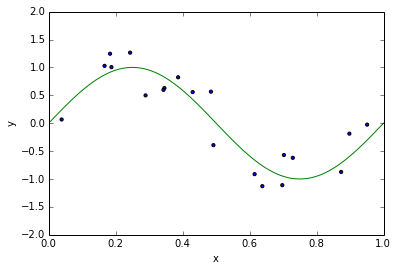

In [40]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeaturespolynomials
from sklearn.pipeline import make_pipeline
    
np.random.seed(9)

def f(x):
    return np.sin(2 * np.pi * x)

# generate points used to plot
x_plot = np.linspace(0, 1, 100)

# generate points and keep a subset of them
# y is random around the f(x)=sin(2*pi*x)
n_samples = 100
X = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis]
y = f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

# get the current axis instance
ax = plt.gca()

# plot the random points
#ax.scatter(X, y, s=10)
ax.scatter(X_train, y_train, s=10)
ax.set_ylim((-2, 2))
ax.set_xlim((0, 1))
ax.set_ylabel('y')
ax.set_xlabel('x')

# plot f(x)
ax.plot(x_plot, f(x_plot), color='green')


## Now let's see how different polynomials can approximate this curve.

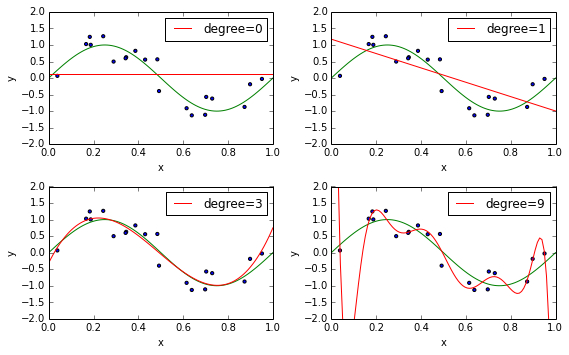

In [45]:
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), color='green')
    ax.scatter(X_train, y_train, s=10)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right')  #, fontsize='small')

fig, axes = plt.subplots(2, 2, figsize=(8, 5))

# fit different polynomials and plot approximations
for ax, degree in zip(axes.ravel(), [0, 1, 3, 9]):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    plot_approximation(est, ax, label='degree=%d' % degree)
    
plt.tight_layout()